In [1]:
# %load_ext autoreload
# %autoreload 2
from SyntheticSmokeDataset import SyntheticSmokeTrain
from IPython.display import Image, display

In [8]:
import os
import argparse
import datetime
import numpy as np
from sys import exit
from time import time
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter

from random import randint
import torch.distributed as dist
import torch.multiprocessing as mp
from torch.nn.parallel import DistributedDataParallel
from torch.utils.data import DistributedSampler
from torchvision.utils import save_image


In [3]:
train_dataset = SyntheticSmokeTrain({},
                                    # data_root="/data/field/AlertWildfire/Labelled Frames/non-smoke/", 
                #  overlays_root="/data/field/AlertWildfire/Labelled Frames/synth_smoke/masks/",
                 mask_thresh= 0.3,
                 dataset_limit = -1)
dataloader = DataLoader(train_dataset, batch_size=1)

Number of non smoke images : 301, Sample path: /data/field/nextcloud_nautilus_sync/AlertWildfire/Labelled Frames/non-smoke/Axis-Pepperwood1_5886.jpg
Debug mode: False, dataset_limit: -1


In [5]:
train_dataset[0].keys()

dict_keys(['idx', 'input_img', 'target_mask', 'bg', 'fg'])

49


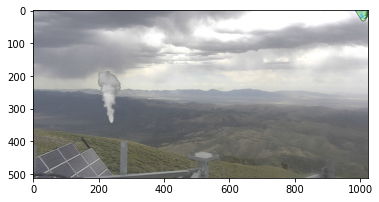

In [31]:
ri = randint(1,100)
# ri = 80
print(ri)
plottable_data = train_dataset[ri]
plt.imshow(plottable_data['input_img'].permute((1,2,0)).numpy())

cant save idx: tensor or list of tensors expected, got <class 'int'>


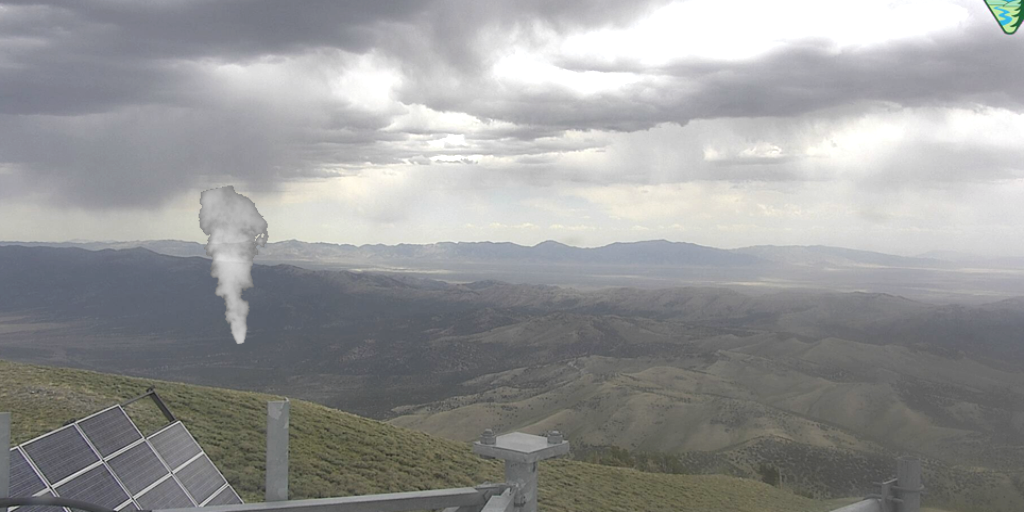

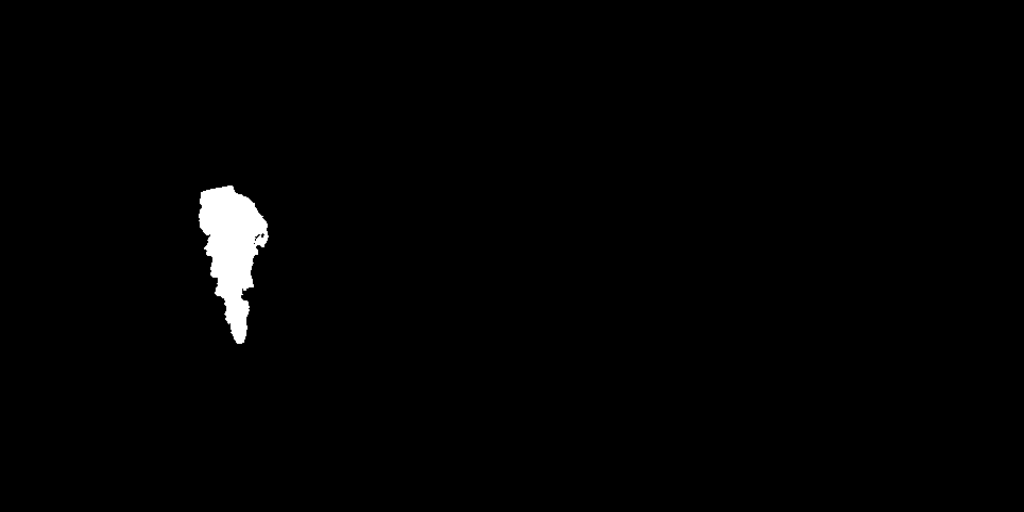

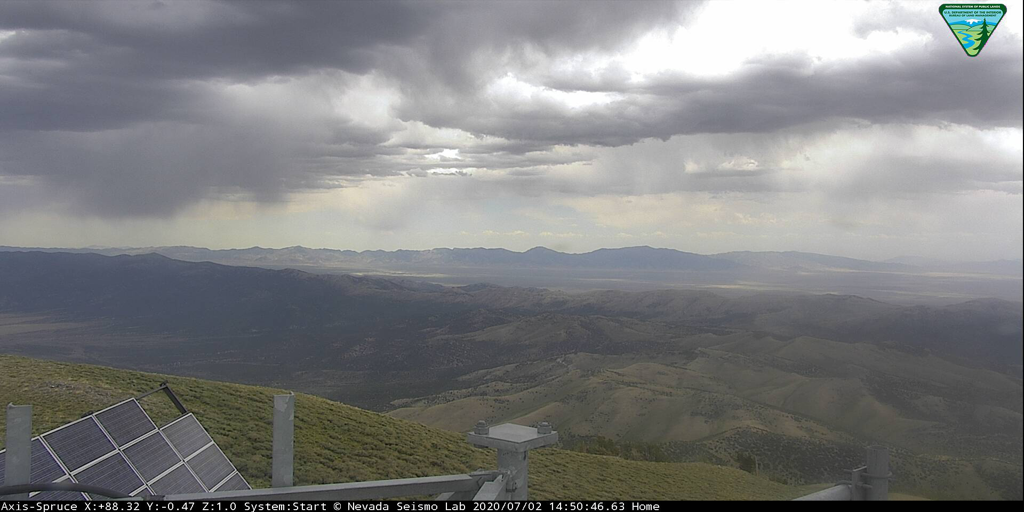

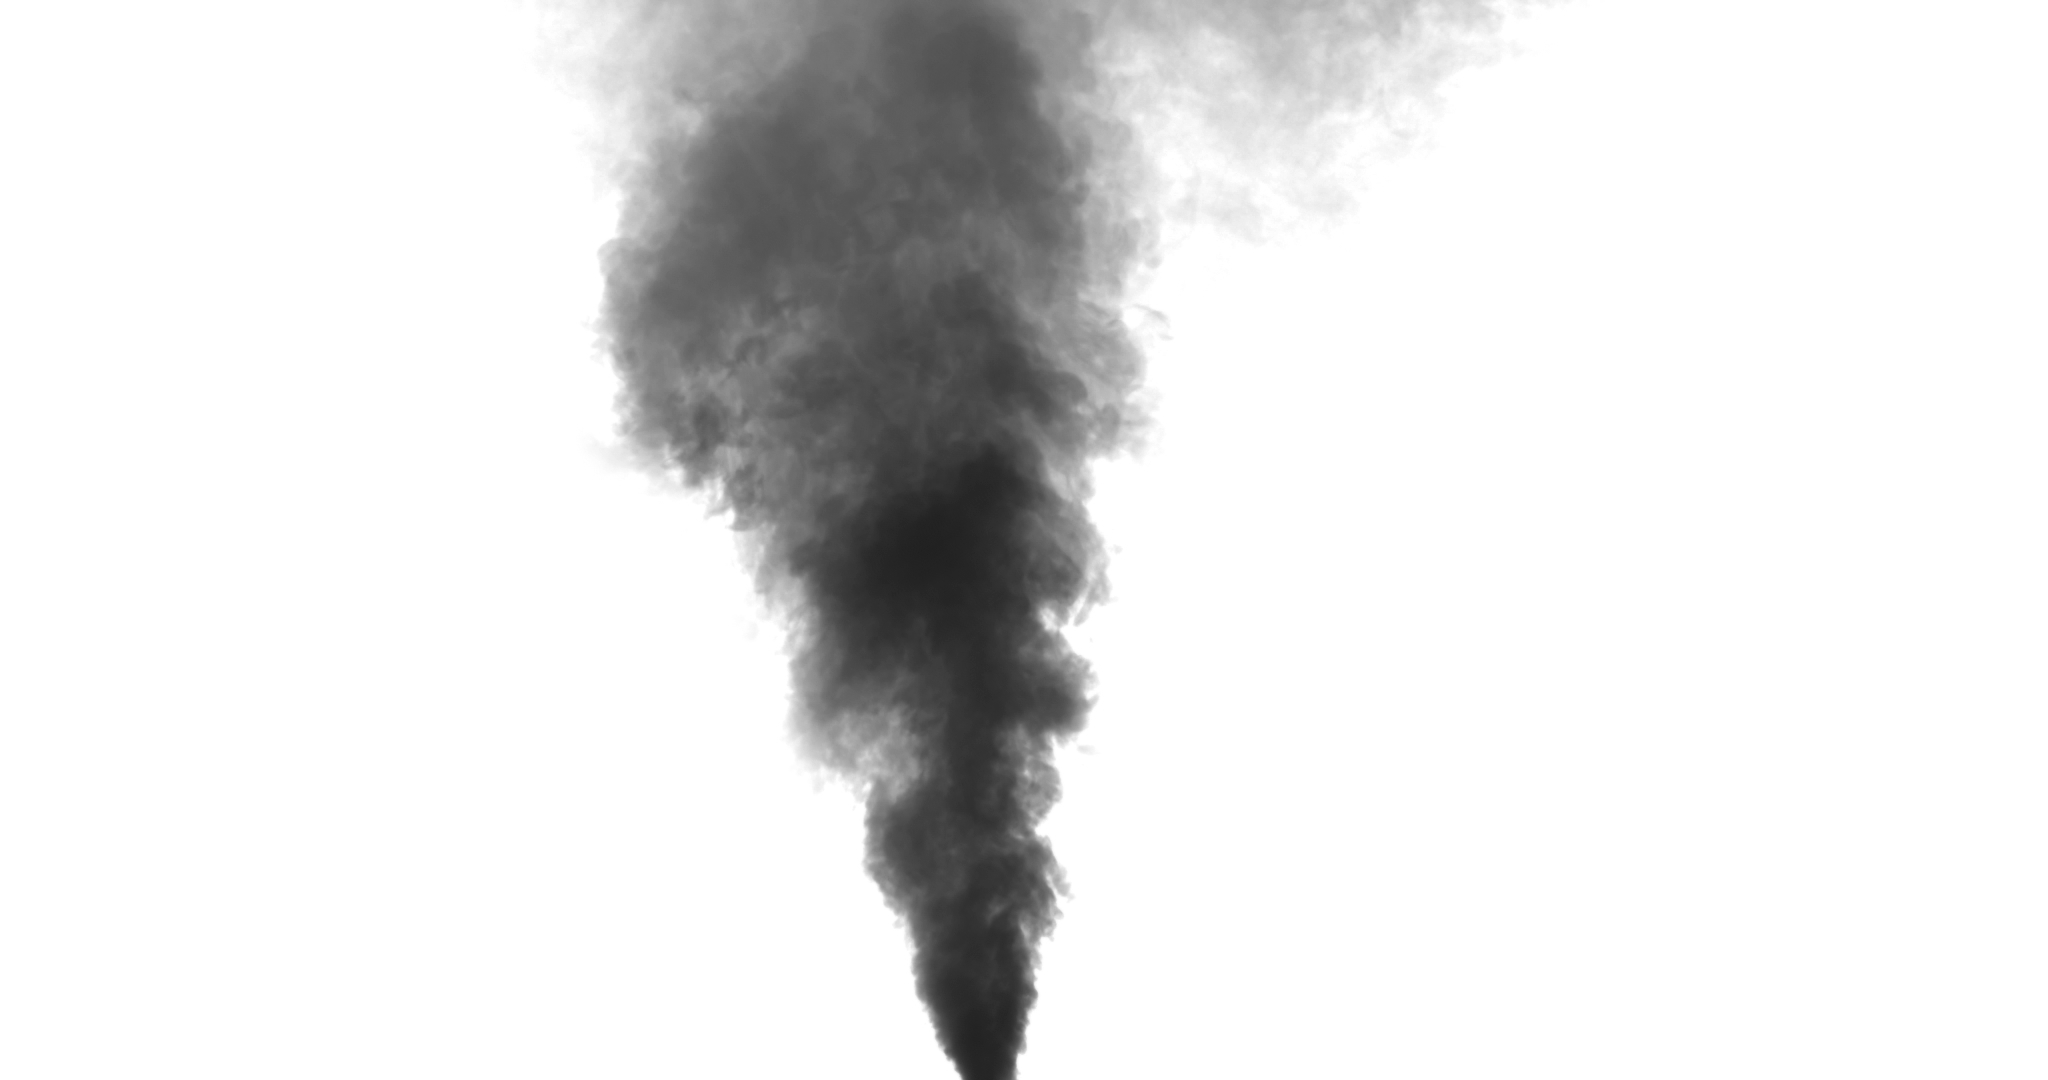

In [32]:
for k,v in plottable_data.items():
    fn = os.path.join('./temp_dir_synth_examples/',"{}_{}.png".format(ri,k))
    try:
        save_image(v, fn)
        display(Image(fn))
    except Exception as e:
        print("cant save {}: {}".format(k, e))

80